In [1]:
import pandas as pd

# Data loading
df = pd.read_csv("data/owid-covid-data.csv")

# check columns
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [2]:
# first five rows
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [3]:
# identify missing values
df.isnull().sum()

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [4]:
# Data cleaning
# filter countries of interest 
countries = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(countries)].copy()

# drop rows with missing dates or critical values
critical_columns = ['date', 'total_cases', 'total_deaths', 'total_vaccinations']
df_filtered.dropna(subset=critical_columns, inplace=True)

# convert 'date' to datetime
df_filtered['date'] = pd.to_datetime(df_filtered['date'], errors='coerce')

# handle remaining missing numeric values using interpolate
numeric_cols = [
    'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
    'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated'
]
df_filtered[numeric_cols] = df_filtered[numeric_cols].interpolate(method='linear')

# reset index after cleaning
df_filtered.reset_index(drop=True, inplace=True)

# save cleaned data for use later
df_filtered.to_csv('data/cleaned_covid_data.csv', index=False)

print(df_filtered.head())

  iso_code continent location       date  total_cases  new_cases  \
0      IND      Asia    India 2021-01-15   10450284.0        0.0   
1      IND      Asia    India 2021-01-16   10450284.0        0.0   
2      IND      Asia    India 2021-01-17   10557985.0   107701.0   
3      IND      Asia    India 2021-01-18   10557985.0        0.0   
4      IND      Asia    India 2021-01-19   10557985.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0           18045.571      150999.0         0.0              223.429  ...   
1           18045.571      150999.0         0.0              223.429  ...   
2           15385.857      152274.0      1275.0              182.143  ...   
3           15385.857      152274.0         0.0              182.143  ...   
4           15385.857      152274.0         0.0              182.143  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0          20.6                   59.55                  

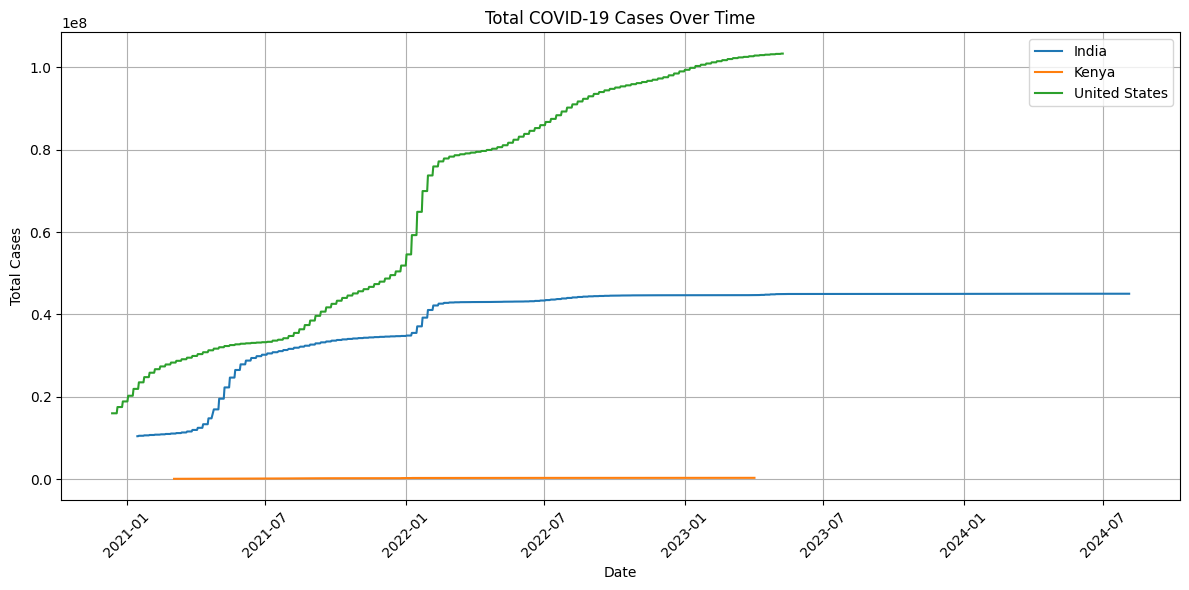

In [5]:
# Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# load cleaned data
df = pd.read_csv('data/cleaned_covid_data.csv')
df['date'] = pd.to_datetime(df['date'])

# plot total cases over time for selected countries
plt.figure(figsize=(12, 6))
for country in df['location'].unique():
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

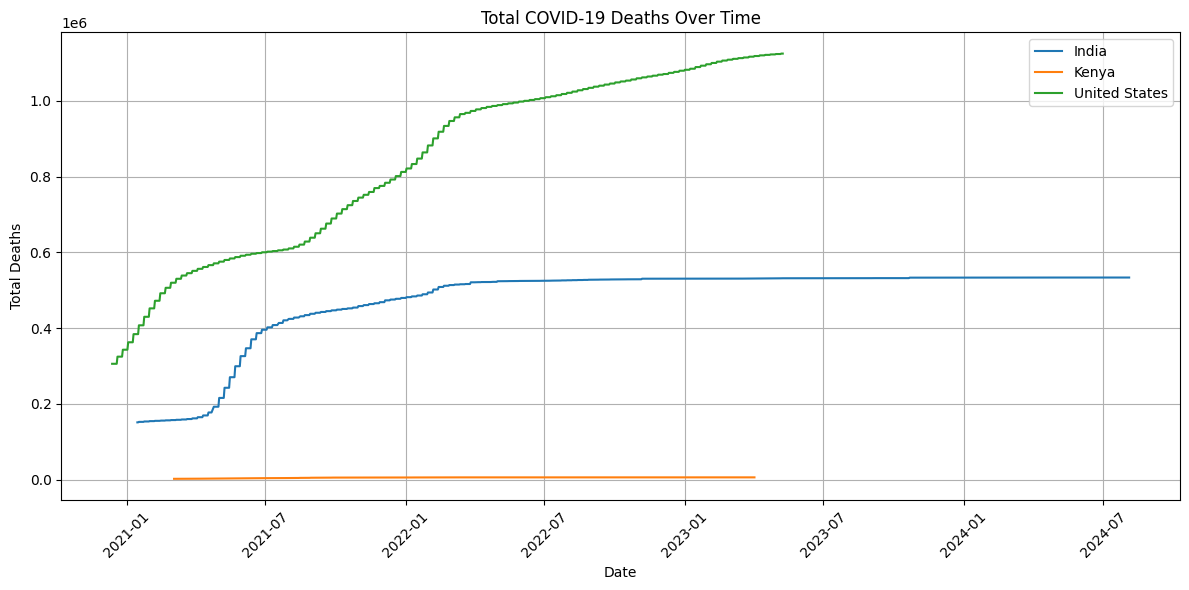

In [6]:
# plot total deaths over time
plt.figure(figsize=(12, 6))
for country in df['location'].unique():
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_deaths'], label=country)
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

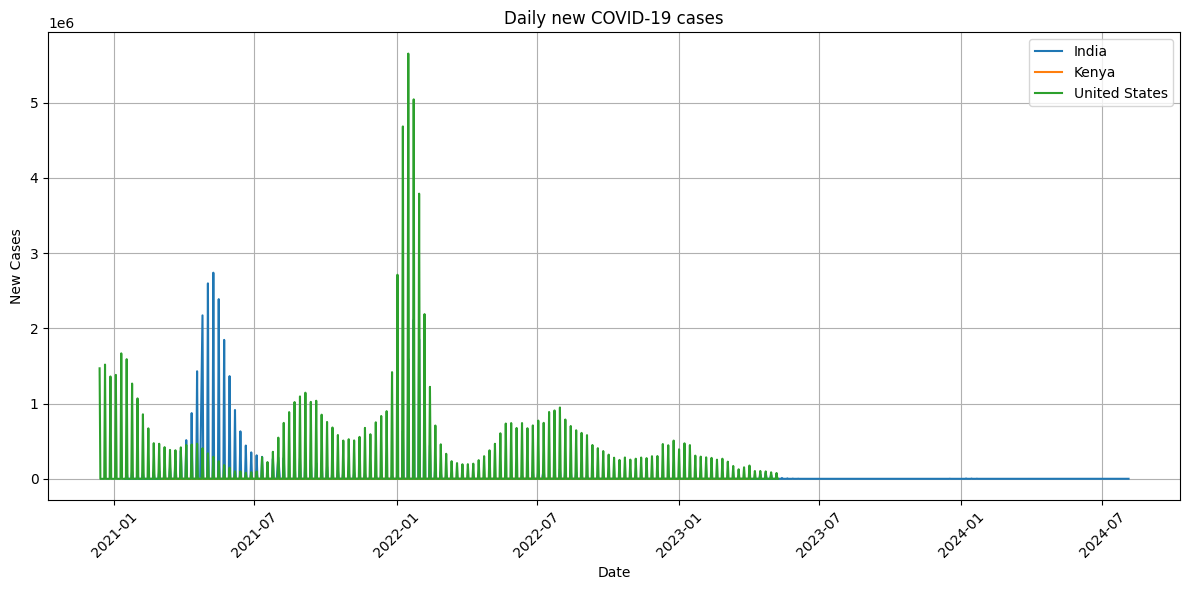

In [7]:
# compare daily new cases between countries.
plt.figure(figsize=(12, 6))
for country in df['location'].unique():
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['new_cases'], label=country)

plt.title('Daily new COVID-19 cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

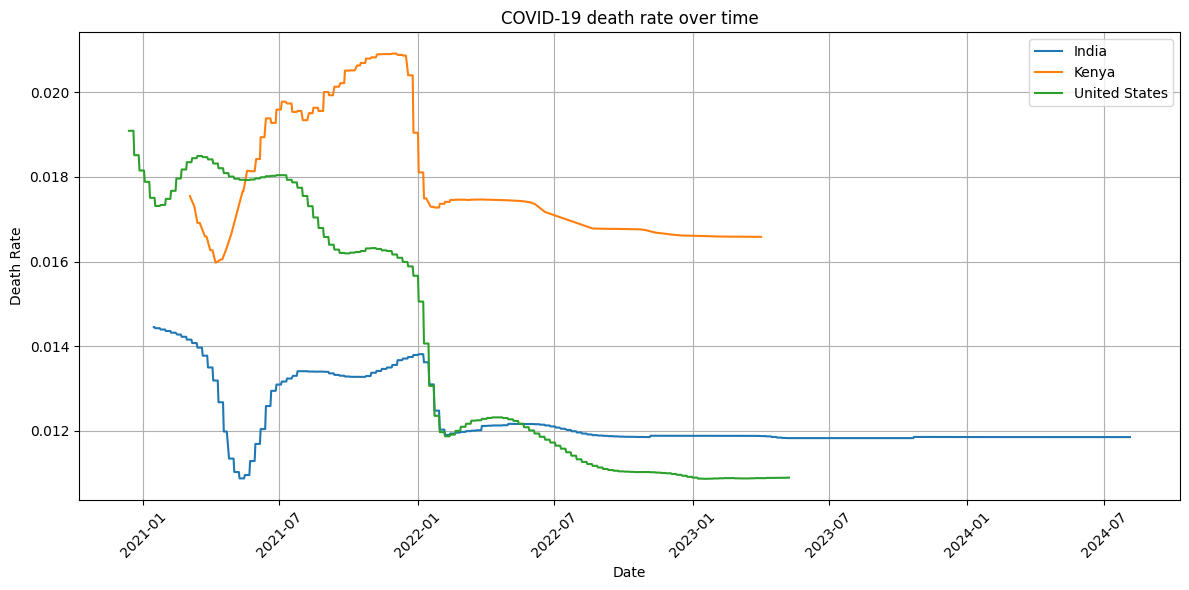

In [8]:
# calculate and plot death rate
df['death_rate'] = df['total_deaths'] / df['total_cases']

plt.figure(figsize=(12, 6))
for country in df['location'].unique():
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['death_rate'], label=country)
plt.title('COVID-19 death rate over time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

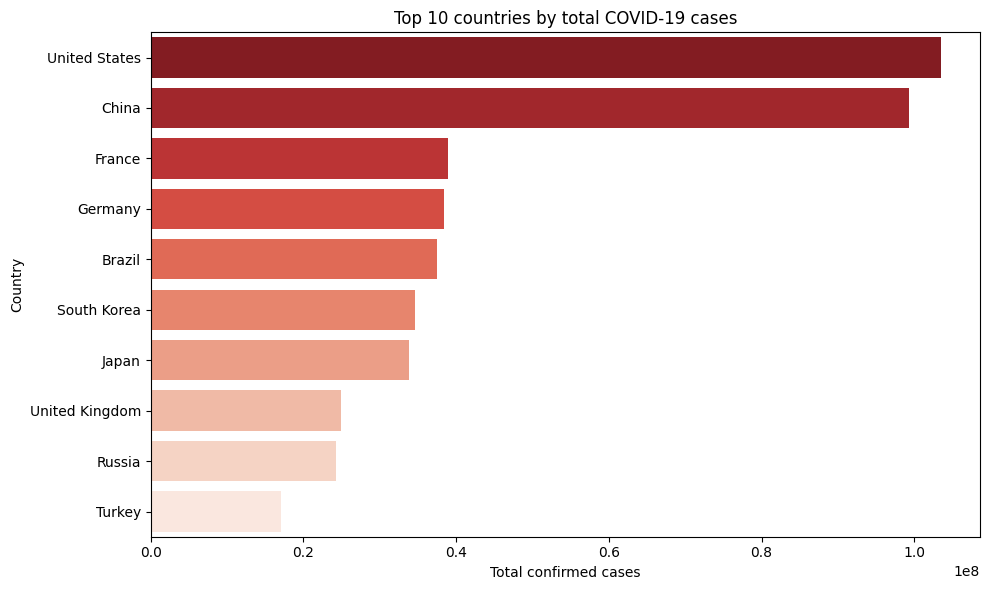

In [9]:
# top countries by total cases
# load data
df = pd.read_csv('data/owid-covid-data.csv')

# filter to keep only actual countries
df_countries = df[df['iso_code'].str.len() == 3]

# sort by date to get latest values
df_countries = df_countries.sort_values('date')

# get the latest record per country
latest_data = df_countries.groupby('location').tail(1)

# get top 10 countries by total cases
top_countries = latest_data.sort_values(by='total_cases', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_countries,
    x='total_cases',
    y='location',
    hue='location',
    palette='Reds_r',
    dodge=False,
    legend=False 
)
plt.title('Top 10 countries by total COVID-19 cases')
plt.xlabel('Total confirmed cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

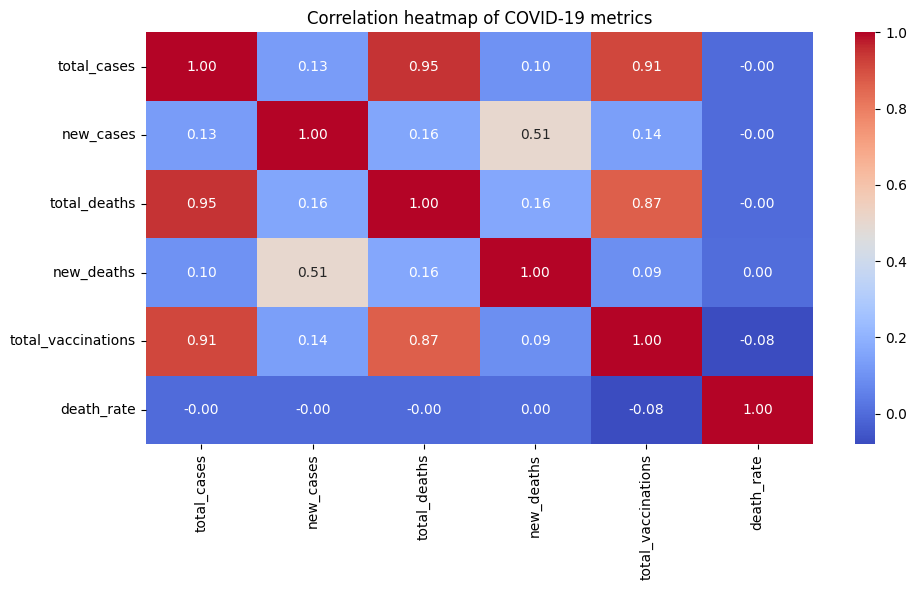

In [10]:
# heatmap of correlation matrix for numeric columns
df['death_rate'] = df['total_deaths'] / df['total_cases']
corr_df = df[['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations', 'death_rate']]

plt.figure(figsize=(10, 6))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation heatmap of COVID-19 metrics')
plt.tight_layout()
plt.show()

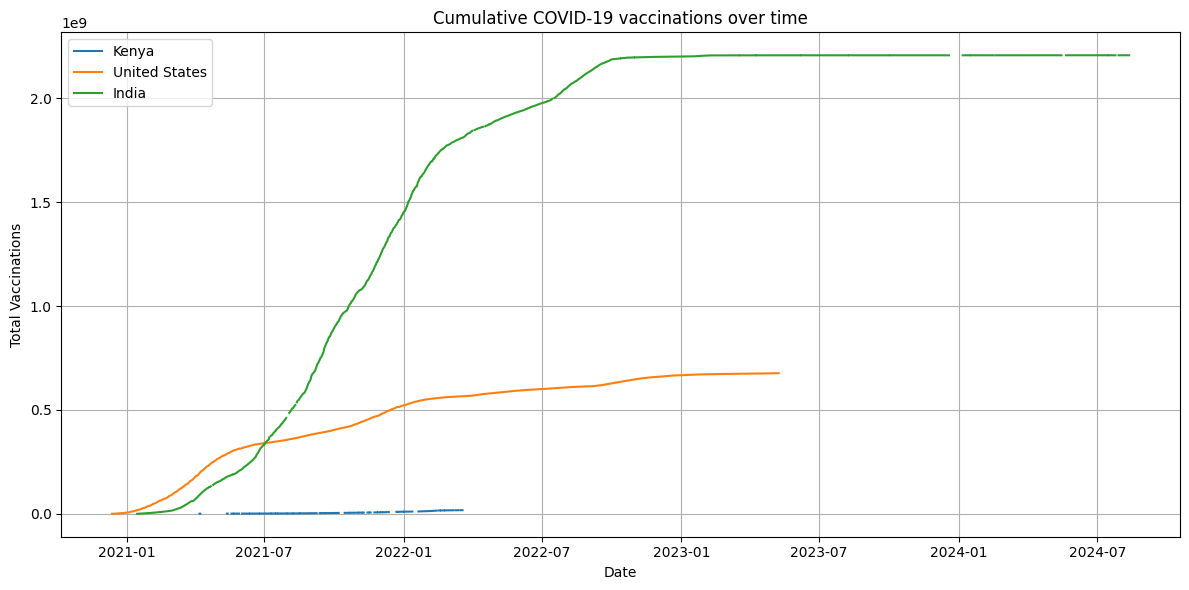

In [11]:
# filter relevant countries
selected_countries = ['Kenya', 'United States', 'India']
df_vax = df[df['location'].isin(selected_countries)].copy()
df_vax['date'] = pd.to_datetime(df_vax['date']) 

# plot total vaccinations over time
plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = df_vax[df_vax['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title('Cumulative COVID-19 vaccinations over time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

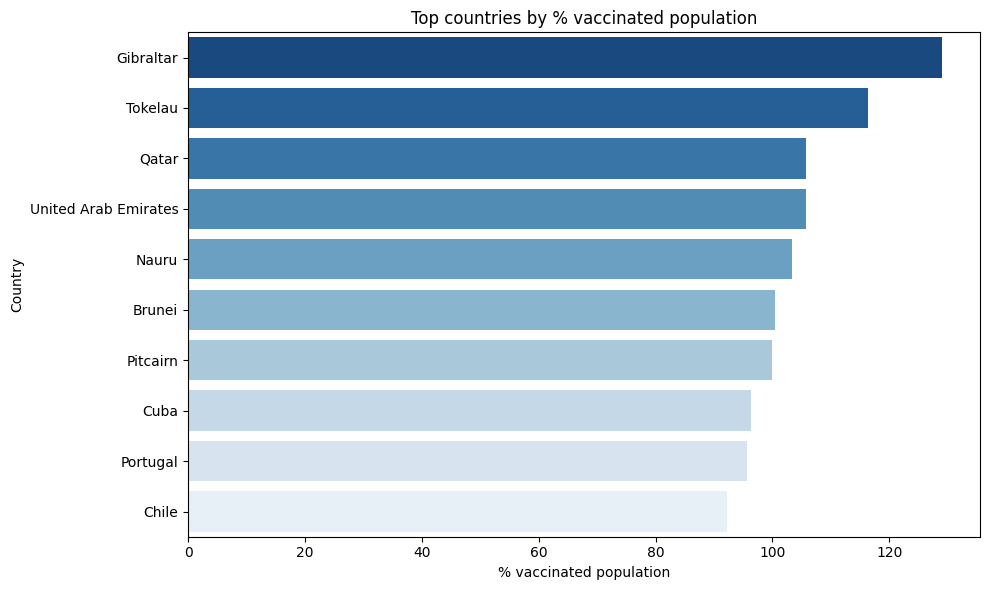

In [15]:
# compare % vaccinated Population
latest_data.loc[:, 'vaccinated_percentage'] = (latest_data['people_vaccinated'] / latest_data['population']) * 100

# remove rows where vaccinated percentage or population data is missing or invalid
latest_data = latest_data.dropna(subset=['vaccinated_percentage', 'population'])
latest_data = latest_data[latest_data['vaccinated_percentage'] > 0]  # remove countries with zero % vaccinated

# sort by vaccinated percentage and select top 10 countries
top_vaccinated = latest_data[['location', 'vaccinated_percentage']].sort_values(by='vaccinated_percentage', ascending=False).head(10)

# plot comparison of % vaccinated population
plt.figure(figsize=(10, 6))
sns.barplot(
    x='vaccinated_percentage', 
    y='location', 
    data=top_vaccinated, 
    hue='location', 
    palette='Blues_r', 
    legend=False
)
plt.title('Top countries by % vaccinated population')
plt.xlabel('% vaccinated population')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

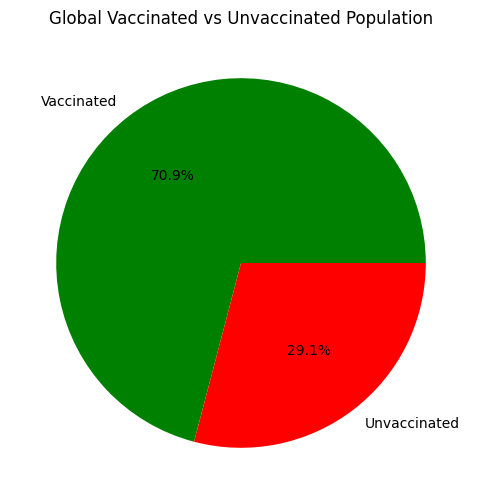

In [16]:
# global vaccinated vs unvaccinated population oie chart

# get latest record for each country
latest_data = df_countries.sort_values('date').groupby('location', as_index=False).last()

# drop rows with missing data
latest_data = latest_data.dropna(subset=['people_vaccinated', 'population'])

# calculate global totals
total_vaccinated = latest_data['people_vaccinated'].sum()
total_population = latest_data['population'].sum()
total_unvaccinated = total_population - total_vaccinated

# pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    [total_vaccinated, total_unvaccinated],
    labels=['Vaccinated', 'Unvaccinated'],
    autopct='%1.1f%%',
    colors=['green', 'red']
)
plt.title('Global Vaccinated vs Unvaccinated Population')
plt.show()

In [17]:
import plotly.express as px

# Sort to get latest data per country
latest_data = df_countries.sort_values('date').groupby('location', as_index=False).last()

# Drop rows without ISO code or total_cases
latest_data = latest_data.dropna(subset=['iso_code', 'total_cases'])

# Create choropleth map
fig = px.choropleth(
    latest_data,
    locations='iso_code',
    color='total_cases',
    hover_name='location',
    color_continuous_scale='Reds',
    title='Total COVID-19 cases by country (Latest)'
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()